In [1]:
import pandas as pd

df = pd.read_csv('../data/sales.csv')
df.dropna(subset=['price'], inplace=True)

In [2]:
df.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm
1,NaN,"$430,570",3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm
2,$270k,"$213,070",3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm
3,NaN,"$229,174",3 Ton 50 Kg,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.5 meters,102 cm,27 cm
4,$97k,"$122,659",2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm


In [14]:
df['year'] = pd.to_datetime(df.purchase_date).dt.year
train_raw = df[df.year < 2015].reset_index(drop=True)
test_raw = df[df.year >= 2015].reset_index(drop=True)

# 1. Random Forest

<font color='red'>Assignment:</font> Build a pipeline with **RandomForestRegressor** to predict **price** with **cost**, **weight**, **height**, **width**, **depth**, and **volumn**.

In [15]:
def numerical_feature(X):
    df = pd.DataFrame()
    df['cost'] = X.cost.map(lambda x: float(x.strip('$').strip('k').replace(',', ''))
                            if type(x) == str else x)
    df['weight'] = X.weight.map(lambda x: 1000.*float(x.split()[0]) + float(x.split()[2]) 
                                if type(x) == str else x)
    df['height'] = X.height.map(lambda x: 100.*float(x.split()[0])
                                if type(x) == str else x)
    df['width'] = X.width.map(lambda x: float(x.split()[0])
                              if type(x) == str else x)
    df['depth'] = X.depth.map(lambda x: float(x.split()[0])
                              if type(x) == str else x)
    df['volumn'] = df.height * df.width * df.depth
    return df
class Numerical_Transformer(object):
    def fit(self, X, y=None):
        self.X = numerical_feature(X)
        self.mean = self.X.mean()
    
    def transform(self, X, y=None):
        return numerical_feature(X).fillna(self.mean)
        
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline


In [8]:
model = Pipeline(steps=[('ntf', Numerical_Transformer()), 
                        ('rescale', MinMaxScaler()), 
                         ('rf', RandomForestRegressor())])

In [17]:
train = pd.DataFrame(columns = ['price', 'cost'])
train['cost'] = train_raw['cost'].map(lambda x: x if type(x) is float else 1000*float(x.strip('$').strip('k')))
train['price'] = train_raw['price'].map(lambda x: x if type(x) is float else float(x.strip('$').replace(',', '')))
features = list(train.columns)
target = "price"
features.remove(target)

X_train = train[features]
y_train = train[target]
X_train = X_train.fillna(X_train.mean())

test = pd.DataFrame(columns = ['price', 'cost'])
test['price'] = test_raw['price'].map(lambda x: x if type(x) is float else float(x.strip('$').replace(',', '')))
test['cost'] = test_raw['cost'].map(lambda x: x if type(x) is float else 1000*float(x.strip('$').strip('k')))
X_test = test[features]
y_test = test[target]
X_test = X_test.fillna(X_train.mean())
train_raw

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth,year
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm,2008
1,NaN,"$430,570",3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm,1997
2,$270k,"$213,070",3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm,2001
3,$97k,"$122,659",2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm,2000
4,$59k,"$60,320",2 Ton 930 Kg,Aug 19 2011,H,super advanced,M14124,"IN732067,IN732068,IN732069,IN732070,IN732071,I...",2.71 meters,96 cm,25 cm,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
2752,$254k,"$255,179",3 Ton 40 Kg,Apr 20 2012,D,intermediate,M14261,"IN732220,IN732456,IN733681,IN732831,IN733123,I...",2.02 meters,113 cm,30 cm,2012
2753,$91k,"$144,631",2 Ton 890 Kg,Jul 12 2002,D,advanced,M14904,"IN732503,IN732583,IN732373,IN732338,IN732347,I...",2.52 meters,99 cm,26 cm,2002
2754,NaN,"$40,384",2 Ton 830 Kg,May 25 2007,"J,B",intermediate,M14578,"IN732832,IN732166,IN733162,IN733785,IN732069,I...",2.15 meters,106 cm,28 cm,2007
2755,$44k,"$55,931",2 Ton 950 Kg,Apr 12 2002,R,advanced,M14341,IN732587,2.52 meters,100 cm,26 cm,2002


In [18]:
model = model.fit(train_raw, y_train)

In [20]:
y_train_pred = model.predict(train_raw)
y_test_pred = model.predict(test_raw)

<font color='red'>Assignment:</font> Calculate the train/test scores.

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

train MAE: 4.34e+04
train MSE: 4.42e+09
train R2: 0.896


In [23]:
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

test MAE: 1.27e+05
test MSE: 5.39e+10
test R2: 0.375


<font color='red'>Assignment:</font> Plot the feature importance in a bar chart.

In [24]:
coef=model.steps[2][1].feature_importances_
coef

array([0.47031039, 0.13477367, 0.11918757, 0.06893968, 0.02330163,
       0.18348706])

Text(0, 0.5, 'feature_importances')

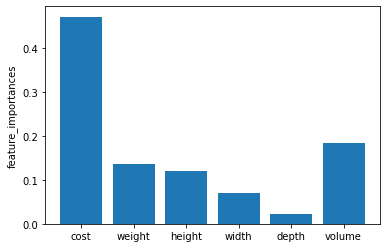

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#plt.plot(['cost', 'weight', 'height', 'width', 'depth'], coef)
plt.bar(['cost', 'weight', 'height', 'width', 'depth','volume'], 
        coef)
plt.ylabel('feature_importances')

<font color='red'>Question:</font> How does Random Forest work? Why is it better than a single decision tree?

<font color='red'>Question:</font> Why is Random Forest better than a single decision tree? How does it decrease model error? How does it affect bias and virance?

# Random forests are a strong modeling technique and much more robust than a single decision tree. They aggregate many decision trees to limit overfitting as well as error due to bias and therefore yield useful results.
# Ideally, we would like to minimize both error due to bias and error due to variance. Enter random forests. Random forests mitigate this problem well. A random forest is simply a collection of decision trees whose results are aggregated into one final result. Their ability to limit overfitting without substantially increasing error due to bias is why they are such powerful models.
# A random forest is simply a collection of decision trees whose results are aggregated into one final result. One way Random Forests reduce variance is by training on different samples of the data. A second way is by using a random subset of features.

<font color='red'>Question:</font> What is Bagging?

# Bagging (Bootstrap Aggregation) is used when our goal is to reduce the variance of a decision tree. Here idea is to create several subsets of data from training sample chosen randomly with replacement. Now, each collection of subset data is used to train their decision trees.
# The fundamental difference is that in Random forests, only a subset of features are selected at random out of the total and the best split feature from the subset is used to split each node in a tree, unlike in bagging where all features are considered for splitting a node.

<font color='red'>Assignment:</font> Tune hyperparameters with k-fold cross validation to optimize model performance.

In [29]:
def price2num(x):
    if type(x) == str: 
        x = x.strip('$').replace(',', '')
    return float(x)
features = list(train_raw.columns)
target = 'price'
features.remove(target)
X = train_raw[features]
y = train_raw[target].map(price2num)

X_test = test_raw[features]
y_test = test_raw[target].map(price2num)


In [30]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=2019)

mean_mse = []
for max_depth in range(1,30):
    mse = []
    for train_index, test_index in kf.split(X):
        X_train, X_valid = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_valid = y.iloc[train_index], y.iloc[test_index]

        steps=[('ntf', Numerical_Transformer()), 
                        ('rescale', MinMaxScaler()), 
                         ('dt', RandomForestRegressor(criterion='mse', max_depth=max_depth))]                         
        model = Pipeline(steps)
        model = model.fit(X_train, y_train)
        
        mse.append(mean_squared_error(y_valid, model.predict(X_valid)))
    mean_mse.append(sum(mse)/len(mse))

Text(0.5, 0, 'max_depth')

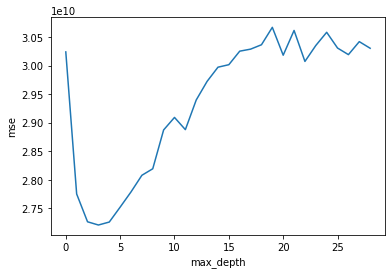

In [32]:
plt.plot(mean_mse)
plt.ylabel('mse')
plt.xlabel('max_depth')

<font color='red'>Question:</font> What are the hyper parameters which can effetively affect model performance? How do they affect the performance respectively?

# 2. Gradient Boosting Trees

<font color='red'>Assignment:</font> Build a pipeline with **GradientBoostingRegressor** to predict **price** with **cost**, **weight**, **height**, **width**, **depth**, and **volumn**.

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

In [36]:
gbm = GradientBoostingRegressor(learning_rate = 0.1,
                                random_state = 1234)

In [37]:
model = Pipeline(steps=[('ntf', Numerical_Transformer()), 
                        ('rescale', MinMaxScaler()), 
                         ('gmb', GradientBoostingRegressor())])

In [83]:
train = pd.DataFrame(columns = ['price', 'cost'])
train['cost'] = train_raw['cost'].map(lambda x: x if type(x) is float else 1000*float(x.strip('$').strip('k')))
train['price'] = train_raw['price'].map(lambda x: x if type(x) is float else float(x.strip('$').replace(',', '')))
features = list(train.columns)
target = "price"
features.remove(target)

X_train = train[features]
y_train = train[target]
X_train = X_train.fillna(X_train.mean())

test = pd.DataFrame(columns = ['price', 'cost'])
test['price'] = test_raw['price'].map(lambda x: x if type(x) is float else float(x.strip('$').replace(',', '')))
test['cost'] = test_raw['cost'].map(lambda x: x if type(x) is float else 1000*float(x.strip('$').strip('k')))
X_test = test[features]
y_test = test[target]
X_test = X_test.fillna(X_train.mean())
train_raw
y_train

0       300492.0
1       430570.0
2       213070.0
3       122659.0
4        60320.0
          ...   
2752    255179.0
2753    144631.0
2754     40384.0
2755     55931.0
2756     44370.0
Name: price, Length: 2757, dtype: float64

In [40]:
model = model.fit(train_raw, y_train)

In [41]:
y_train_pred = model.predict(train_raw)
y_test_pred = model.predict(test_raw)

<font color='red'>Assignment:</font> Calculate the train/test scores.

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

train MAE: 9.34e+04
train MSE: 1.89e+10
train R2: 0.556


In [43]:
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

test MAE: 1.25e+05
test MSE: 5.34e+10
test R2: 0.381


<font color='red'>Assignment:</font> Plot the feature importance in a bar chart.

In [44]:
coef=model.steps[2][1].feature_importances_
coef

array([0.70527019, 0.07665392, 0.04452196, 0.01369493, 0.00452187,
       0.15533713])

Text(0, 0.5, 'feature_importances')

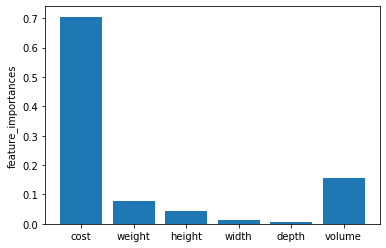

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#plt.plot(['cost', 'weight', 'height', 'width', 'depth'], coef)
plt.bar(['cost', 'weight', 'height', 'width', 'depth','volume'], 
        coef)
plt.ylabel('feature_importances')

<font color='red'>Question:</font> How does gradient boosting tree work? 

# Gradient boosting is a type of machine learning boosting. It relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error. The key idea is to set the target outcomes for this next model in order to minimize the error.

<font color='red'>Question:</font> What is boosting?

# Boosting is a method of converting weak learners into strong learners. In boosting, each new tree is a fit on a modified version of the original data set.

<font color='red'>Question:</font> Compare gradient boosting trees and random forest. What are the pros and cons of these two models?

# Random Forests (RF) and Gradient Boosting Machine (GBM). GBM and RF both are ensemble learning methods and predict (regression or classification) by combining the outputs from individual trees (we assume tree-based GBM or GBT). 
# GBM and RF differ in the way the trees are built: the order and the way the results are combined. It has been shown that GBM performs better than RF if parameters tuned carefully.

#  Strengths of RF
## RF is much easier to tune than GBM. There are typically two parameters in RF: number of trees and number of features to be selected at each node. RF is harder to overfit than GBM.
# weaknesses of RF
## The main limitation of the Random Forests algorithm is that a large number of trees may make the algorithm slow for real-time prediction. For data including categorical variables with different number of levels, random forests are biased in favor of those attributes with more levels. Therefore, the variable importance scores from random forest are not reliable for this type of data. Methods such as partial permutations were used to solve the problem


# Strengths of GBM.
## Since boosted trees are derived by optimizing an objective function, basically GBM can be used to solve almost all objective function that we can write gradient out. This including things like ranking and poission regression, which RF is harder to achieve.
# Weaknesses of GBM
## GBMs are more sensitive to overfitting if the data is noisy. Training generally takes longer because of the fact that trees are built sequentially. GBMs are harder to tune than RF. There are typically three parameters: number of trees, depth of trees and learning rate, and each tree built is generally shallow.


<font color='red'>Assignment:</font> Tune hyperparameters with k-fold cross validation to optimize model performance.

In [ ]:
def price2num(x):
    if type(x) == str: 
        x = x.strip('$').replace(',', '')
    return float(x)
features = list(train_raw.columns)
target = 'price'
features.remove(target)
X = train_raw[features]
y = train_raw[target].map(price2num)

X_test = test_raw[features]
y_test = test_raw[target].map(price2num)


In [59]:
import numpy
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=2019)

mean_mse = []
for learning_rate in numpy.arange(0.01, 0.5, 0.05):
    mse = []
    for train_index, test_index in kf.split(X):
        X_train, X_valid = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_valid = y.iloc[train_index], y.iloc[test_index]

        steps=[('ntf', Numerical_Transformer()), ('rescale', MinMaxScaler()), 
                         ('dt', GradientBoostingRegressor(learning_rate=learning_rate))]                         
        model = Pipeline(steps)
        model = model.fit(X_train, y_train)
        
        mse.append(mean_squared_error(y_valid, model.predict(X_valid)))
    mean_mse.append(sum(mse)/len(mse))

Text(0.5, 0, 'learning_rate')

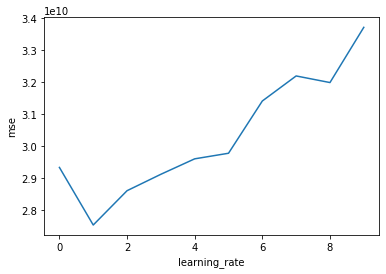

In [60]:
plt.plot(mean_mse)
plt.ylabel('mse')
plt.xlabel('learning_rate')

<font color='red'>Question:</font> What are the hyper parameters which can effetively affect model performance? How do they affect the performance respectively?

# Choose a relatively high learning rate. Generally the default value of 0.1 works but somewhere between 0.05 to 0.2 should work for different problems
# Determine the optimum number of trees for this learning rate. This should range around 40-70. Remember to choose a value on which your system can work fairly fast. This is because it will be used for testing various scenarios and determining the tree parameters.
# Tune tree-specific parameters for decided learning rate and number of trees. Note that we can choose different parameters to define a tree and I’ll take up an example here.
# Lower the learning rate and increase the estimators proportionally to get more robust models.
 

# 3. Xgboost

<font color='red'>Assignment:</font> Build a pipeline with **XGBRegressor** to predict **price** with **cost**, **weight**, **height**, **width**, **depth**, and **volumn**.

In [77]:

from xgboost import XGBRegressor

In [90]:
xgb = XGBRegressor()


In [91]:
model = Pipeline(steps=[('ntf', Numerical_Transformer()), 
                        ('rescale', MinMaxScaler()), 
                         ('xgb', XGBRegressor())])

In [92]:
train = pd.DataFrame(columns = ['price', 'cost'])
train['cost'] = train_raw['cost'].map(lambda x: x if type(x) is float else 1000*float(x.strip('$').strip('k')))
train['price'] = train_raw['price'].map(lambda x: x if type(x) is float else float(x.strip('$').replace(',', '')))
features = list(train.columns)
target = "price"
features.remove(target)

X_train = train[features]
y_train = train[target]
X_train = X_train.fillna(X_train.mean())

test = pd.DataFrame(columns = ['price', 'cost'])
test['price'] = test_raw['price'].map(lambda x: x if type(x) is float else float(x.strip('$').replace(',', '')))
test['cost'] = test_raw['cost'].map(lambda x: x if type(x) is float else 1000*float(x.strip('$').strip('k')))
X_test = test[features]
y_test = test[target]
X_test = X_test.fillna(X_train.mean())
train_raw
y_train

0       300492.0
1       430570.0
2       213070.0
3       122659.0
4        60320.0
          ...   
2752    255179.0
2753    144631.0
2754     40384.0
2755     55931.0
2756     44370.0
Name: price, Length: 2757, dtype: float64

In [93]:
model = model.fit(train_raw, y_train)

[00:16:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [94]:
y_train_pred = model.predict(train_raw)
y_test_pred = model.predict(test_raw)

<font color='red'>Assignment:</font> Calculate the train/test scores.

In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

train MAE: 9.47e+04
train MSE: 1.97e+10
train R2: 0.538


In [96]:
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

test MAE: 1.25e+05
test MSE: 5.40e+10
test R2: 0.373


<font color='red'>Assignment:</font> Plot the feature importance in a bar chart.

In [97]:
coef=model.steps[2][1].feature_importances_
coef

array([0.5261233 , 0.09314594, 0.08713216, 0.12734836, 0.01262776,
       0.15362248], dtype=float32)

Text(0, 0.5, 'feature_importances')

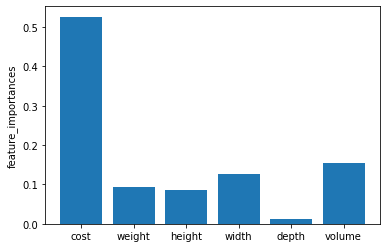

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#plt.plot(['cost', 'weight', 'height', 'width', 'depth'], coef)
plt.bar(['cost', 'weight', 'height', 'width', 'depth','volume'], 
        coef)
plt.ylabel('feature_importances')

<font color='red'>Assignment:</font> Tune hyperparameters with k-fold cross validation to optimize model performance.

In [99]:
def price2num(x):
    if type(x) == str: 
        x = x.strip('$').replace(',', '')
    return float(x)
features = list(train_raw.columns)
target = 'price'
features.remove(target)
X = train_raw[features]
y = train_raw[target].map(price2num)

X_test = test_raw[features]
y_test = test_raw[target].map(price2num)


In [106]:
import numpy
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=2019)

mean_mse = []
for max_depth in range(0,10):
    mse = []
    for train_index, test_index in kf.split(X):
        X_train, X_valid = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_valid = y.iloc[train_index], y.iloc[test_index]

        steps=[('ntf', Numerical_Transformer()), ('rescale', MinMaxScaler()), 
                         ('xgb', XGBRegressor(max_depth=max_depth))]                         
        model = Pipeline(steps)
        model = model.fit(X_train, y_train)
        
        mse.append(mean_squared_error(y_valid, model.predict(X_valid)))
    mean_mse.append(sum(mse)/len(mse))

[00:30:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:30:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:30:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:30:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:30:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:30:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:30:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:30:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:30:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

Text(0.5, 0, 'max_depth')

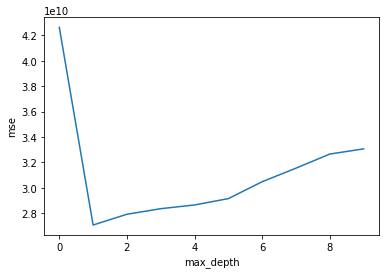

In [107]:
plt.plot(mean_mse)
plt.ylabel('mse')
plt.xlabel('max_depth')

<font color='red'>Question:</font> What are the hyper parameters which can effetively affect model performance? How do they affect the performance respectively?

# Choose a relatively high learning rate. Generally a learning rate of 0.1 works but somewhere between 0.05 to 0.3 should work for different problems. Determine the optimum number of trees for this learning rate. XGBoost has a very useful function called as “cv” which performs cross-validation at each boosting iteration and thus returns the optimum number of trees required.
# Tune tree-specific parameters ( max_depth, min_child_weight, gamma, subsample, colsample_bytree) for decided learning rate and number of trees. Note that we can choose different parameters to define a tree and I’ll take up an example here.
# Tune regularization parameters (lambda, alpha) for xgboost which can help reduce model complexity and enhance performance.
# Lower the learning rate and decide the optimal parameters .


<font color='red'>Question:</font> What is the relationship and difference between Xgboost and gradient boosting trees? Why Xgboost performs better than graident boosting trees?


# I think the difference between the gradient boosting and the Xgboost is in xgboost the algorithm focuses on the computational power, by parallelizing the tree formation which one can see in this blog.

# Gradient boosting only focuses on the variance but not the trade off between bias where as the xg boost can also focus on the regularization factor.

# Both xgboost and gbm follows the principle of gradient boosting. There are however, the difference in modeling details. Specifically, xgboost used a more regularized model formalization to control over-fitting, which gives it better performance.